In [2]:
#Importando todas as classes necessárias.

%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
#Leitura dos arquivos em Excel.

IDH = pd.read_excel('Indicator_HDI.xlsx')
GDP_cap = pd.read_excel('indicator WB data GDP pc ppp.xlsx')
Mil_exp = pd.read_excel('military expenditure.xlsx')
Energy_total = pd.read_excel('Electricity Generation.xlsx')

#IDH.head()
#GDP_cap.head()
#Mil_exp.head()
#Energy_total.head()

In [4]:
#Mundando o index de cada tabela.

idh_index = IDH.set_index('HDI')
GDP_cap_index = GDP_cap.set_index('GDP per capity, 2005 ppp, WB data')
Mil_exp_index = Mil_exp.set_index('Military expenditure (% of GDP)')

In [5]:
#Transpondo os dados e defindo os anos a serem analisados.

IDH_trans=idh_index.transpose()
IDH_idx=IDH_trans[IDH_trans.index>2000]
IDH_x=IDH_idx.transpose()

In [6]:
#Transpondo os dados e defindo os anos a serem analisados.

GDP_cap_trans = GDP_cap_index.transpose()
GDP_cap_idx = GDP_cap_trans[GDP_cap_trans.index>2000]
GDP_cap_x = GDP_cap_idx.transpose()

In [7]:
#Transpondo os dados e defindo os anos a serem analisados.

Mil_exp_trans = Mil_exp_index.transpose()
Mil_exp_idx = Mil_exp_trans[Mil_exp_trans.index>'2000']
Mil_exp_x = Mil_exp_idx.transpose()

In [36]:
#Fazendo a seleção dos paises a serem trabalhados.

IDH_select = IDH_x.loc[['China','United States','Russia','United Kingdom','France','Israel','Belize','Mongolia','Switzerland','Afghanistan','Mozambique'],:]
GDP_cap_select = GDP_cap_x.loc[['China','United States','Russia','United Kingdom','France','Israel','Belize','Mongolia','Switzerland','Afghanistan','Mozambique'],:]
Mil_exp_select = Mil_exp_x.loc[['China','United States','Russia','United Kingdom','France','Israel','Belize','Mongolia','Switzerland','Afghanistan','Mozambique'],:]

#IDH_select
#GDP_cap_select
#Mil_exp_select

,2005,2006,2007,2008,2009,2011
HDI,,,,,,
China,0.633,0.644,0.656,0.665,0.674,0.687
United States,0.902,0.904,0.905,0.907,0.906,0.910
Russia,0.725,0.733,0.742,0.748,0.747,0.755
United Kingdom,0.855,0.853,0.856,0.860,0.860,0.863
France,0.869,0.873,0.877,0.879,0.880,0.884
Israel,0.874,0.877,0.882,0.882,0.884,0.888
Belize,0.689,0.690,0.692,0.695,0.696,0.699
Mongolia,0.611,0.621,0.631,0.641,0.642,0.653
Switzerland,0.890,0.893,0.893,0.892,0.899,0.903


Text(0.5, 1.0, 'IDH dos paises selecionados de 2005 a 2011')

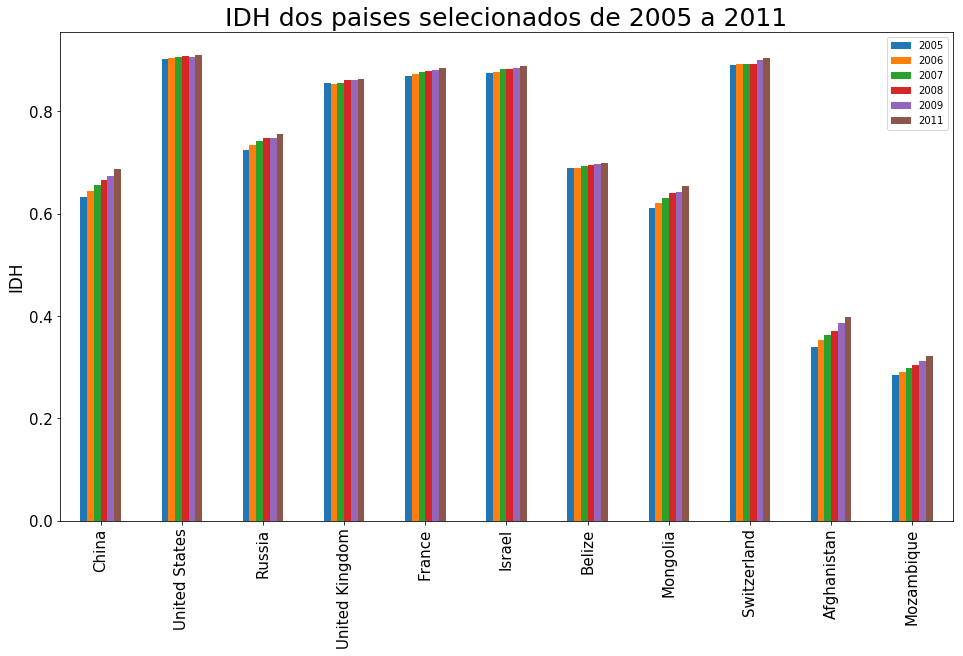

In [9]:
#Plotando o gráfico do IDH dos paises selecionados.

plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["axes.labelsize"] = 17
plt.rcParams["lines.markersize"] = 15
IDH_select.plot.bar()
plt.ylabel('IDH')
plt.xlabel('')
plt.title('IDH dos paises selecionados de 2005 a 2011')

No gráfico de barras acima é possível perceber que todos os paises, menos Suiça e Israel, tem um IDH muito menor do que os paises do P5. Tanto Suiça quanto Israel estão abaixo do P5, porém próximos.

Text(0.5, 1.0, 'PIB per capita dos paises selecionados de 2001 a 2011')

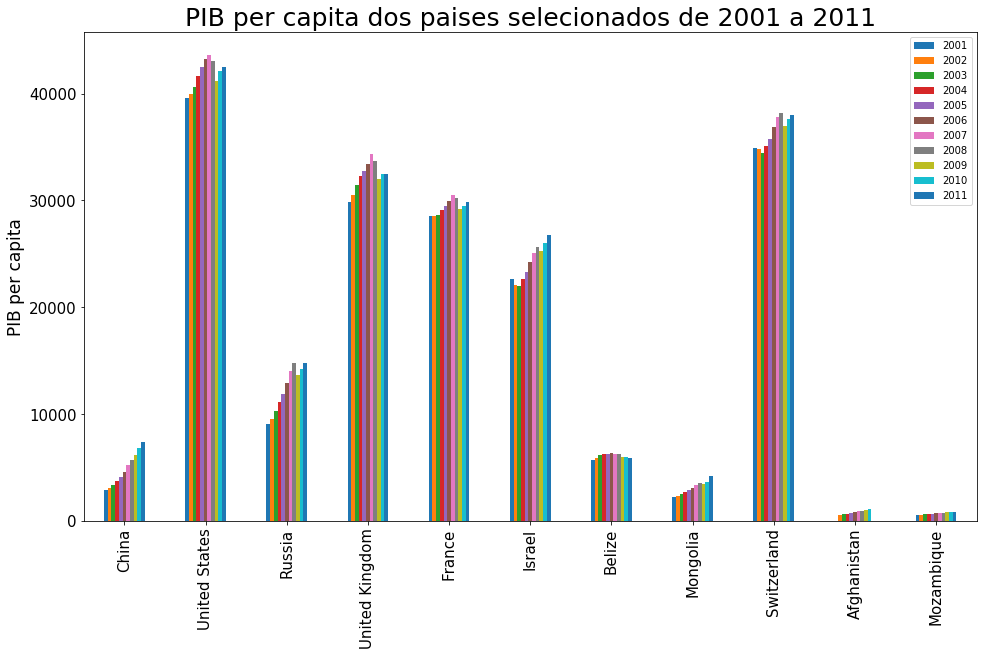

In [10]:
#Plotando o gráfico do PIB per capita dos paises selecionados.

plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["axes.labelsize"] = 17
plt.rcParams["lines.markersize"] = 15
GDP_cap_select.plot.bar()
plt.ylabel('PIB per capita')
plt.xlabel('')
plt.title('PIB per capita dos paises selecionados de 2001 a 2011')

No gráfico do PIB per capita é possível ver alguns grupos, por exemplo: EUA, Reino Unido, Suiça, França e Israel estão no grupo do mais ricos; Já China, Russia, Belize, Mongolia, Afeganistão e Moçambique estão nos pobres. 

Vale ressaltar que mesmo com dois grupos os membros do P5 se destacam como os mais ricos, em seus respectivos grupos, contudo a Suiça comprova o inverso sendo o segundo país mais rico dentro do grupo dos ricos.

Text(0.5, 1.0, 'Gasto miliatr dos paises selecionados de 2001 a 2011')

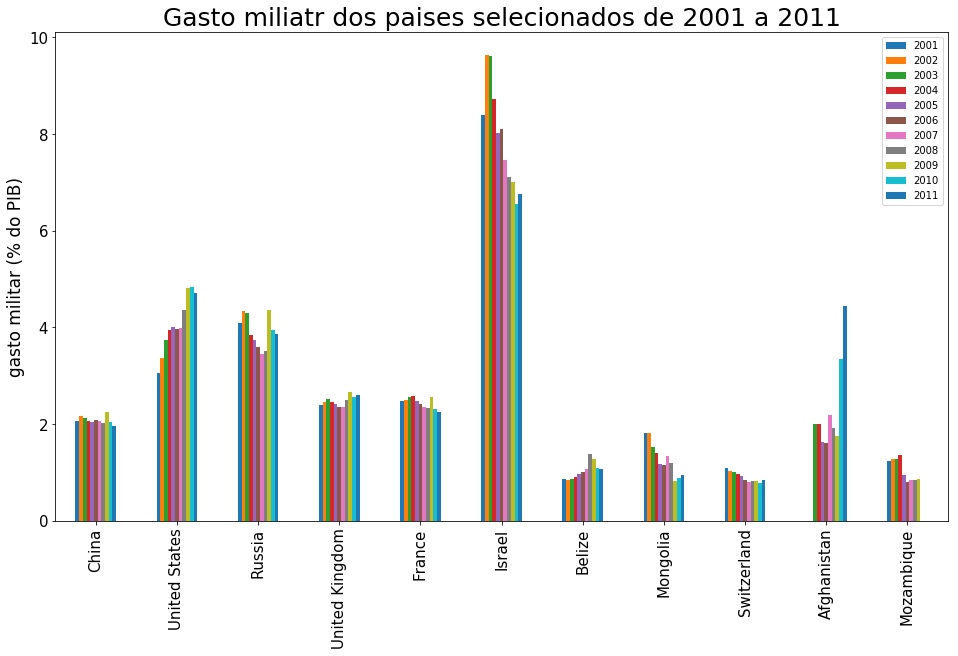

In [11]:
#Plotando o gráfico do gasto militar em relação de % do PIB, dos paises selecionados.

plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["axes.labelsize"] = 17
plt.rcParams["lines.markersize"] = 15
Mil_exp_select.plot.bar()
plt.ylabel('gasto militar (% do PIB)')
plt.xlabel('')
plt.title('Gasto miliatr dos paises selecionados de 2001 a 2011')

Na questão militarista, Israel tem o maior gasto percentual e o Afeganistão tem o terceiro maior gasto percentual, todos os outros paises que não nunca foram do CSNU não estão perto de chegar no nível de gasto militar do P5.

Contudo vale destacar que isso é um dado em termos percentuais de PIB, ou seja, Israel gasta mais em termos percentuais, não significa que em termos quantitativos ele gaste mais do que os EUA, por exemplo.

In [50]:
df = IDH_select.join(Mil_exp_select, how='inner', lsuffix='IDH', rsuffix='MIL')
df

,2005,2006,2007,2008,2009,2011,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
China,0.633,0.644,0.656,0.665,0.674,0.687,2.070126,2.177297,2.120411,2.070324,2.049342,2.089551,2.054096,2.031553,2.241108,2.042276,1.951861
United States,0.902,0.904,0.905,0.907,0.906,0.910,3.055951,3.368397,3.744357,3.938667,4.006216,3.963048,3.989178,4.368274,4.822730,4.833364,4.713270
Russia,0.725,0.733,0.742,0.748,0.747,0.755,4.081131,4.344124,4.300348,3.852661,3.729795,3.592498,3.440859,3.508020,4.362590,3.942643,3.869151
United Kingdom,0.855,0.853,0.856,0.860,0.860,0.863,2.402447,2.460739,2.523255,2.451658,2.418336,2.351428,2.345860,2.489417,2.667209,2.568090,2.594613
France,0.869,0.873,0.877,0.879,0.880,0.884,2.486504,2.506988,2.562123,2.578565,2.476358,2.416808,2.346469,2.331012,2.553132,2.303201,2.248842
Israel,0.874,0.877,0.882,0.882,0.884,0.888,8.392789,9.636058,9.619576,8.722140,8.027837,8.101779,7.465419,7.114940,7.002204,6.549769,6.767955
Belize,0.689,0.690,0.692,0.695,0.696,0.699,0.854514,0.841664,0.865210,0.899363,0.959749,1.013928,1.076952,1.371470,1.278725,1.095646,1.065129
Mongolia,0.611,0.621,0.631,0.641,0.642,0.653,1.823723,1.810320,1.525309,1.393004,1.180836,1.147891,1.335580,1.187036,0.821013,0.884699,0.951643
Switzerland,0.890,0.893,0.893,0.892,0.899,0.903,1.083843,1.034638,1.006097,0.965265,0.935534,0.850891,0.811935,0.814454,0.823859,0.779555,0.853236
Afghanistan,0.340,0.354,0.363,0.370,0.387,0.398,NaN,NaN,2.007599,1.994818,1.630822,1.614267,2.195464,1.912833,1.759664,3.342447,4.436039
